In [40]:
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

from sklearn.metrics import jaccard_score

sns.set_theme(style="darkgrid")

In [41]:
# check files
! ls -lh ml-latest

total 1.2G
-rw-r--r-- 1 danie 197609 9.6K Mar 10 18:17 README.txt
-rw-r--r-- 1 danie 197609 396M Mar 10 18:17 genome-scores.csv
-rw-r--r-- 1 danie 197609  18K Mar 10 18:17 genome-tags.csv
-rw-r--r-- 1 danie 197609 1.3M Mar 10 18:17 links.csv
-rw-r--r-- 1 danie 197609 2.8M Mar 10 18:17 movies.csv
-rw-r--r-- 1 danie 197609 725M Mar 10 18:17 ratings.csv
-rw-r--r-- 1 danie 197609  38M Mar 10 18:17 tags.csv


In [42]:
# check movies/genre
! head -10 ml-latest/movies.csv

movieId,title,genres
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children
9,Sudden Death (1995),Action


In [43]:
# check tag scores
! head -10 ml-latest/genome-scores.csv

movieId,tagId,relevance
1,1,0.029000000000000026
1,2,0.023749999999999993
1,3,0.05425000000000002
1,4,0.06874999999999998
1,5,0.15999999999999998
1,6,0.19524999999999998
1,7,0.07600000000000001
1,8,0.252
1,9,0.22749999999999998


In [44]:
# check tag descriptions
! head -10 ml-latest/genome-tags.csv

tagId,tag
1,007
2,007 (series)
3,18th century
4,1920s
5,1930s
6,1950s
7,1960s
8,1970s
9,1980s


In [45]:
# seperate datsets
genres_df = pd.read_csv('ml-latest/movies.csv')
ratings_df = pd.read_csv('ml-latest/ratings.csv')
tagscores_df = pd.read_csv('ml-latest/genome-scores.csv')
tags_df = pd.read_csv('ml-latest/genome-tags.csv')

In [46]:
genres_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [47]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [48]:
tagscores_df.head()

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000


In [49]:
tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [50]:
# extract info from title and seperate into two columns title & released

def clean_movie_header(title):

    s = re.search('\(([^)]+)', title)

    if s:
        title = title[:s.span()[0]].strip()
    
    if title[-5:] == ', The':
        title = 'The ' + title[:-5]
    elif title[-4:] == ', An':
        title = 'An ' + title[:-4]
    elif title[-3:] == ', A':
        title = 'A ' + title[:-3]
        
    return title

In [51]:
# clean title and extract release year
genres_df['title'] = genres_df['title'].str.strip()
genres_df['Title'] = genres_df['title'].map(clean_movie_header)

# using regex syntax find and extract only the LAST parenthesis and its elements which is (year) inside title
genres_df['Release Year'] = genres_df['title'].apply(lambda x: re.findall(r'\((\d+)\)[^()]*$', x)).apply(lambda x: int(x[0]) if len(x) > 0 else 0)
genres_df['Release Year'] = genres_df['Release Year'].astype('Int64')

<AxesSubplot: xlabel='count', ylabel='Release Year'>

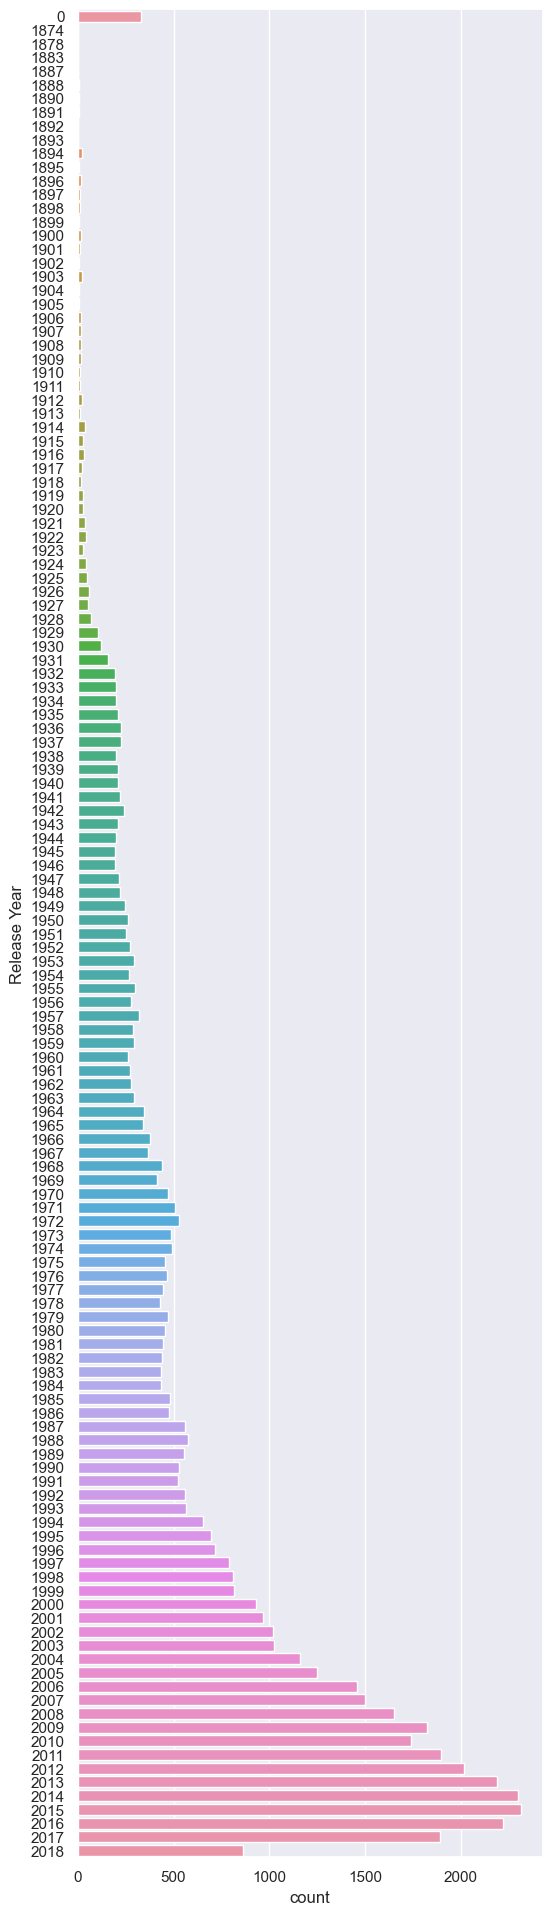

In [52]:
# visualize data using released date, 0 if no date specified
f, ax = plt.subplots(figsize = (6,24))
sns.set_color_codes("pastel")
sns.countplot(y=genres_df['Release Year'])

In [53]:
genres_df.head()

,movieId,title,genres,Title,Release Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995


In [54]:
filtered_mv = genres_df.loc[(genres_df['Release Year'] >= 1930) & (genres_df['Release Year'] <= 2021)]

In [55]:
sorted_mv = filtered_mv.sort_values(by='Release Year', ascending=False)
sorted_mv

,movieId,title,genres,Title,Release Year
58097,193886,Leal (2018),Action|Crime|Drama,Leal,2018
56290,189191,Edie (2018),Drama,Edie,2018
56261,189129,What We Started (2018),Documentary,What We Started,2018
56262,189131,Birthmarked (2018),Comedy,Birthmarked,2018
56264,189137,McKellen: Playing the Part (2018),Documentary,McKellen: Playing the Part,2018
...,...,...,...,...,...
53075,182217,Playful Pan (1930),Animation,Playful Pan,1930
53087,182241,Arctic Antics (1930),Animation,Arctic Antics,1930
53089,182245,Autumn (1930),Animation,Autumn,1930
53090,182247,Monkey Melodies (1930),Animation,Monkey Melodies,1930


<AxesSubplot: xlabel='count', ylabel='Release Year'>

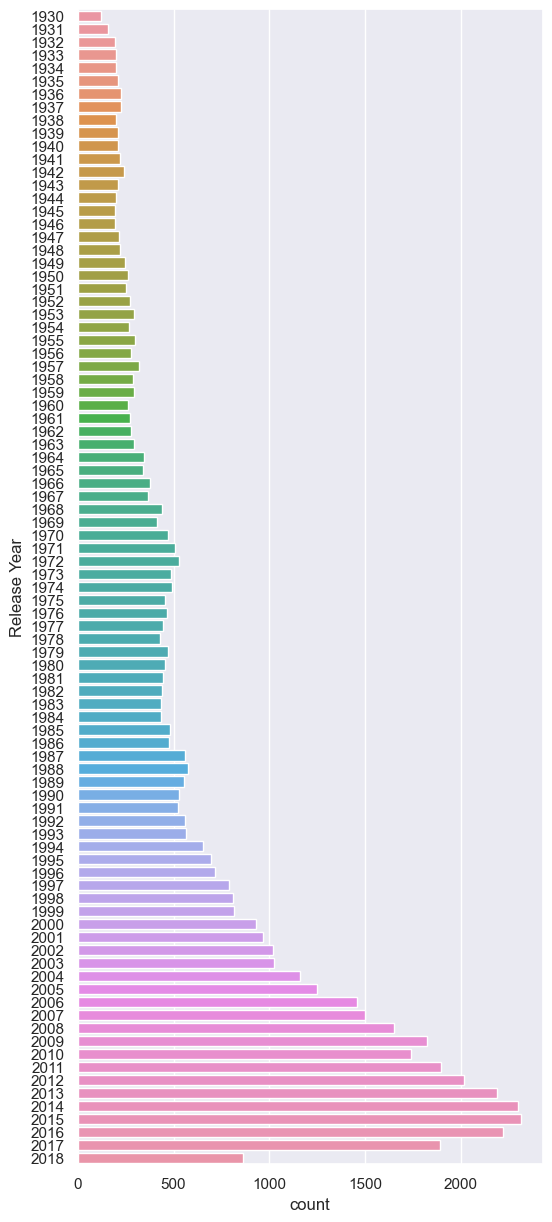

In [56]:
# visualize filtered date from 1930 to 2018
f, ax = plt.subplots(figsize = (6,15))
sns.set_color_codes("pastel")
sns.countplot(y=filtered_mv['Release Year'])

In [57]:
# create binary indicators for each genre
genres_df_stack = filtered_mv[filtered_mv['genres'] != '(no genres listed)'].set_index('movieId').genres.str.split('|', expand = True).stack()
genres_df_explode = pd.get_dummies(genres_df_stack, prefix = 'g').groupby(level = 0).sum().reset_index()
del genres_df_stack

In [58]:
# genre vector (binary string)
genres_df_explode['genre_vector'] = genres_df_explode.iloc[:,1:].values.tolist()

In [59]:
genres_df_explode.head()


,movieId,g_Action,g_Adventure,g_Animation,g_Children,g_Comedy,g_Crime,g_Documentary,g_Drama,g_Fantasy,...,g_Horror,g_IMAX,g_Musical,g_Mystery,g_Romance,g_Sci-Fi,g_Thriller,g_War,g_Western,genre_vector
0,1,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
4,5,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [60]:
# merge genre vector with movie dataset
filtered_mv = filtered_mv.merge(genres_df_explode, how='left', on='movieId')

In [61]:
filtered_mv = filtered_mv.drop('title', axis='columns')
filtered_mv = filtered_mv.drop('genres', axis='columns')
filtered_mv.head()


,movieId,Title,Release Year,g_Action,g_Adventure,g_Animation,g_Children,g_Comedy,g_Crime,g_Documentary,...,g_Horror,g_IMAX,g_Musical,g_Mystery,g_Romance,g_Sci-Fi,g_Thriller,g_War,g_Western,genre_vector
0,1,Toy Story,1995,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji,1995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,4,Waiting to Exhale,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ..."
4,5,Father of the Bride Part II,1995,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [62]:
# number of tags
len(np.unique(tags_df.tagId.values))

1128

In [63]:
# number of movies
len(np.unique(tagscores_df.movieId.values))

13176

In [64]:
# number of movie, tag pairs
len(tagscores_df)

14862528

In [65]:
# join dataframes to get tag description and movie title name all in one table
mv_tags_denorm = tagscores_df.merge(tags_df, on = 'tagId').merge(filtered_mv, on = 'movieId')

# for each movie, compute the relevance rank of tags so we can eventually rank order tags for each movie
mv_tags_denorm['relevance_rank'] = mv_tags_denorm.groupby("movieId")["relevance"].rank(method = "first", ascending = False).astype('int64')

In [66]:
# check out an example of top tags for a movie
mv_tags_denorm[mv_tags_denorm.Title == 'Interstellar'][['movieId','Title','tag','relevance','relevance_rank']].sort_values(by = 'relevance', ascending=False)

,movieId,Title,tag,relevance,relevance_rank
13116200,109487,Interstellar,space travel,0.99850,1
13115339,109487,Interstellar,astronauts,0.99200,2
13116197,109487,Interstellar,space,0.99175,3
13116144,109487,Interstellar,science fiction,0.99050,4
13116145,109487,Interstellar,scifi,0.99000,5
...,...,...,...,...,...
13116324,109487,Interstellar,vampires,0.00275,1124
13116257,109487,Interstellar,swedish,0.00250,1125
13115744,109487,Interstellar,hannibal lecter,0.00200,1126
13116335,109487,Interstellar,vietnam war,0.00200,1127


In [67]:
# compute median relevance score for each relevance rank
mv_tags_rank_agg = mv_tags_denorm.groupby('relevance_rank')['relevance'].median().reset_index(name = 'relevance_median').head(100)

# compute percent change of median relevance score as we go down in rank
mv_tags_rank_agg['relevance_median_pct_chg'] = mv_tags_rank_agg['relevance_median'].pct_change()

Text(0.5, 1.0, 'Box Plot: Tag Relevance Score by Rank')

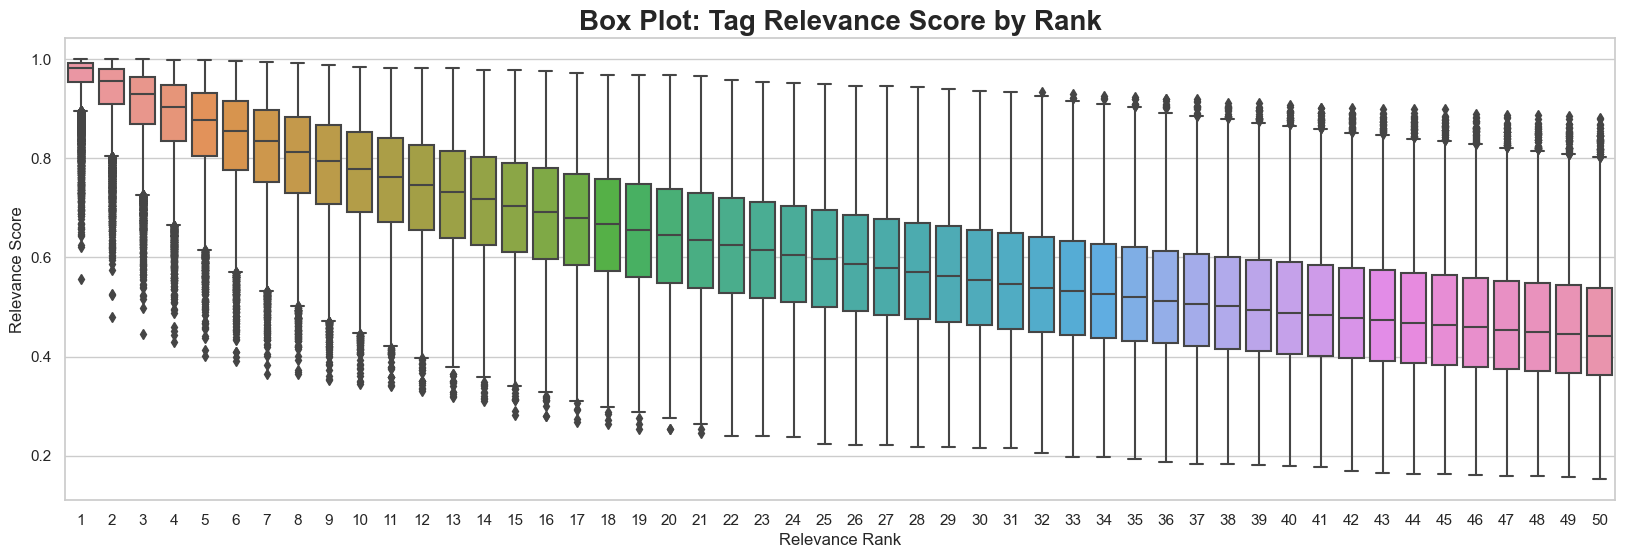

In [68]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(20, 6))

ax = sns.boxplot(x = "relevance_rank", y = "relevance", data = mv_tags_denorm[mv_tags_denorm.relevance_rank <= 50], showfliers = True)
ax.set(ylabel = "Relevance Score")
ax.set(xlabel = "Relevance Rank")
plt.title("Box Plot: Tag Relevance Score by Rank", fontsize = 20, weight = 'bold')

Text(0.5, 1.0, '% Change in Tag Relevance Score by Rank')

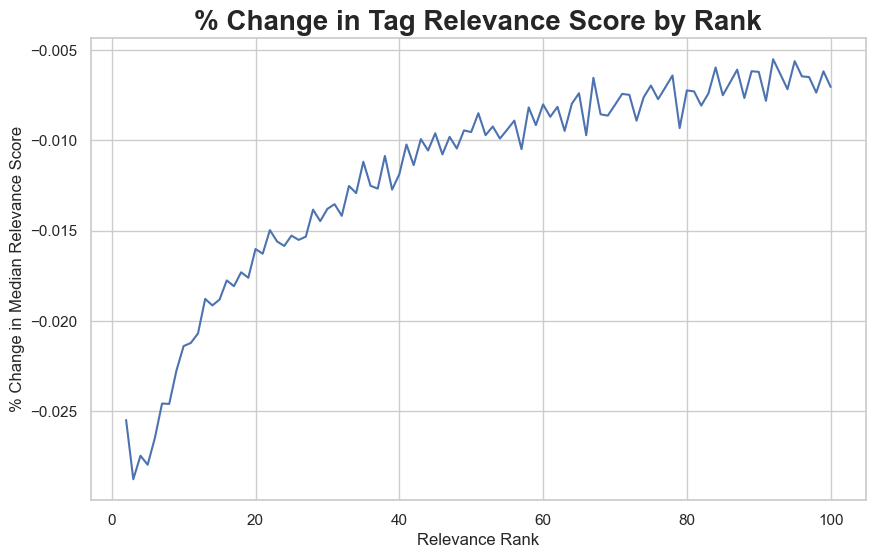

In [69]:
f, ax = plt.subplots(figsize=(10, 6))

ax = sns.lineplot(x="relevance_rank", y="relevance_median_pct_chg", data = mv_tags_rank_agg)
ax.set(ylabel = "% Change in Median Relevance Score")
ax.set(xlabel = "Relevance Rank")
plt.title("% Change in Tag Relevance Score by Rank", fontsize = 20, weight = 'bold')

In [70]:
# display options for pandas dataframe
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', -1)
pd.reset_option('display.max_colwidth')

In [71]:
# flatten tags table to get a list of top 100 tags for each movie
mv_tags_list = mv_tags_denorm[mv_tags_denorm.relevance_rank <= 100].groupby(['movieId','Title'])['tag'].apply(lambda x: ','.join(x)).reset_index()
mv_tags_list['tag_list'] = mv_tags_list.tag.map(lambda x: x.split(','))

In [72]:
mv_tags_list.head(5)

,movieId,Title,tag,tag_list
0,1,Toy Story,"3d,action,adventure,affectionate,animal movie,...","[3d, action, adventure, affectionate, animal m..."
1,2,Jumanji,"action,action packed,adaptation,adapted from:b...","[action, action packed, adaptation, adapted fr..."
2,3,Grumpier Old Men,"adaptation,adventure,bad plot,beautiful scener...","[adaptation, adventure, bad plot, beautiful sc..."
3,4,Waiting to Exhale,"adaptation,adapted from:book,adultery,bad acti...","[adaptation, adapted from:book, adultery, bad ..."
4,5,Father of the Bride Part II,"adaptation,bad plot,bad sequel,betrayal,better...","[adaptation, bad plot, bad sequel, betrayal, b..."


In [73]:
pd.set_option('display.max_colwidth', -1)

mv_tags_list.loc[mv_tags_list.Title == 'Interstellar', ['movieId','Title','tag_list']]

C:\Users\danie\AppData\Local\Temp\ipykernel_21452\10510001.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,movieId,Title,tag_list
11627,109487,Interstellar,"[70mm, adventure, amazing photography, astronauts, atmospheric, bad ending, bad science, big budget, catastrophe, cerebral, cinematography, complex, complicated, complicated plot, confusing, cool, destiny, dialogue, distopia, drama, dramatic, dystopia, dystopic future, emotional, end of the world, epic, excellent script, existentialism, father daughter relationship, first contact, future, futuristic, good, good acting, good soundtrack, graphic design, great acting, great ending, great soundtrack, humanity, imagination, imdb top 250, inspirational, inspiring, intellectual, intelligent sci-fi, intense, interesting, loneliness, long, love, mars, masterpiece, mentor, mindfuck, nasa, natural disaster, original, original plot, oscar (best directing), oscar (best effects - visual effects), pg-13, philosophical, philosophy, plot, plot holes, plot twist, post-apocalyptic, powerful ending, robot, sacrifice, sci fi, sci-fi, science, science fiction, scifi, sentimental, single father, social commentary, solitude, space, space opera, space program, space travel, special effects, story, storytelling, stunning, survival, suspense, technology, thought-provoking, time, time loop, time travel, visual, visually appealing, visually stunning, visuals, weird]"


In [74]:
mv_tags_list.loc[mv_tags_list.Title == 'Oblivion', ['movieId','Title','tag_list']]

,movieId,Title,tag_list
11283,101864,Oblivion,"[action, adapted from:comic, adventure, alien, alien invasion, aliens, allegory, alternate history, alternate reality, amazing cinematography, apocalypse, artificial intelligence, astronauts, bad science, beautiful scenery, better than expected, big budget, catastrophe, cerebral, cgi, chase, cinematography, clones, cloning, complex, conspiracy, cool, culture clash, cyberpunk, destiny, dialogue, distopia, dynamic cgi action, dystopia, dystopic future, effects, end of the world, entertaining, fast paced, fight scenes, first contact, future, futuristic, good, good acting, good soundtrack, good story, great cinematography, great ending, humanity, intelligent sci-fi, interesting, man versus machine, mars, memory, memory loss, mindfuck, nasa, natural disaster, original, original plot, pg-13, philip k. dick, philosophical, philosophy, plot, plot holes, plot twist, post apocalyptic, post-apocalyptic, predictable, robot, robots, sacrifice, sci fi, sci-fi, science, science fiction, scifi, solitude, space, space opera, space travel, special effects, story, storytelling, stunning, survival, suspense, technology, teleportation, thought-provoking, twist ending, twists & turns, visual, visually appealing, visually stunning, visuals, weapons, weird]"


In [76]:
pd.reset_option('display.max_colwidth')


# a function for getting recommendation based on the Jaccard Index of tags
def get_recommendation(target_movie, tags_list, original_mv):

    target_taglist = tags_list[tags_list.Title == target_movie].tag_list.values[0]
    mv_tags_list_sim = tags_list[['movieId','Title','tag_list','tag']]
    res = []

    for i in range(len(tags_list)):

        sim = mv_tags_list_sim.tag_list[i]
        res.append(len(set(sim).intersection(target_taglist)) / len(set(sim).union(target_taglist)))
    
    mv_tags_list_sim['Jaccard Index'] = res
    original_mv = mv_tags_list_sim.sort_values(by='Jaccard Index', ascending= False)

    return original_mv

rec_list = get_recommendation('Interstellar', mv_tags_list, filtered_mv)

C:\Users\danie\AppData\Local\Temp\ipykernel_21452\1369876130.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mv_tags_list_sim['Jaccard Index'] = res


In [77]:
rec_list = rec_list.fillna(0)
rec_list

,movieId,Title,tag_list,tag,Jaccard Index
11627,109487,Interstellar,"[70mm, adventure, amazing photography, astrona...","70mm,adventure,amazing photography,astronauts,...",1.000000
8756,52328,Sunshine,"[alien, aliens, allegory, apocalypse, astronau...","alien,aliens,allegory,apocalypse,astronauts,at...",0.526718
1473,1653,Gattaca,"[1950s, allegory, alone in the world, alternat...","1950s,allegory,alone in the world,alternate re...",0.481481
12786,164179,Arrival,"[alien, alien invasion, aliens, allegory, atmo...","alien,alien invasion,aliens,allegory,atmospher...",0.470588
11446,104841,Gravity,"[3d, action, allegory, amazing cinematography,...","3d,action,allegory,amazing cinematography,amaz...",0.459854
...,...,...,...,...,...
8388,45635,The Notorious Bettie Page,"[1950s, adaptation, adolescence, amazing cinem...","1950s,adaptation,adolescence,amazing cinematog...",0.036269
8139,39779,Tarzan and His Mate,"[1930s, 80s, absurd, action, adolescence, adop...","1930s,80s,absurd,action,adolescence,adoption,a...",0.036269
7485,27114,Takedown,"[adapted from:book, alternate endings, amazing...","adapted from:book,alternate endings,amazing ph...",0.036269
4558,5088,Going Places,"[1970s, absurd, adaptation, adolescence, adult...","1970s,absurd,adaptation,adolescence,adultery,a...",0.036269
